# P2 - Titanic passengers data analysis

By: Alexandre Medeiros Gonçalves

# Titanic data
Reading files from titanic.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

titanic_df = pd.read_csv('titanic_data.csv')

# displaying
print titanic_df.head(5)
print len(titanic_df)

Populating the interactive namespace from numpy and matplotlib
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S 

# Question: Ladies, children and/or richer first?

In the following analysis we will show how variables such as age, paid fare, sex and social class relates with the survival probability. We have a sample of length 891 of a 2224 total passengers, so analysis is made stating hypothesis tests for inference to the population when considered needed.

## Wrangling data.
 The usefull columns for this analysis would be Survived, Pclass, Sex, Age, Fare. First we get rid of the other columns of the data frame.

In [2]:
titanic_df = titanic_df[['Survived', 'Pclass','Age' , 'Sex' , 'Fare']]

#shows dataframe
print titanic_df.head(10)


#counting elements
print titanic_df.count()

#looking at object types
titanic_df.dtypes


   Survived  Pclass  Age     Sex     Fare
0         0       3   22    male   7.2500
1         1       1   38  female  71.2833
2         1       3   26  female   7.9250
3         1       1   35  female  53.1000
4         0       3   35    male   8.0500
5         0       3  NaN    male   8.4583
6         0       1   54    male  51.8625
7         0       3    2    male  21.0750
8         1       3   27  female  11.1333
9         1       2   14  female  30.0708
Survived    891
Pclass      891
Age         714
Sex         891
Fare        891
dtype: int64


Survived      int64
Pclass        int64
Age         float64
Sex          object
Fare        float64
dtype: object

### Age
A possible problem with the Age column are the NaN values that can result in calculation errors (index = 5 above). Fortunately, pandas DataFrames doesn't consider NaN rows by default, for example the count() function has only 714 elements compared to 891 of others. It is the same for other numerical functions, so we just let pandas handle this problem. 
The main limitation of this solution is that it decreases the number of available data points for analysis.

### Pclass
In the code below we use only first and second class for Pclass variable. All third class passengers are turned into second as the plot below suggest that differences between second and third class are not very significant with respect with fare:


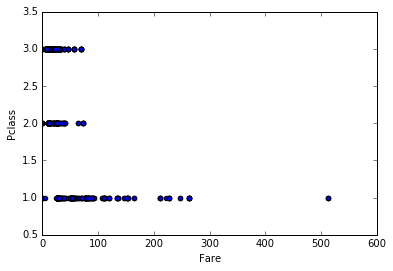

In [4]:
#plot 
titanic_df.plot.scatter(x = 'Fare' , y = 'Pclass', xlim = [0,600])

In [5]:
#turning third class into second and printing
titanic_df.loc[titanic_df['Pclass'] == 3, 'Pclass'] = 2
print titanic_df.head()

   Survived  Pclass  Age     Sex     Fare
0         0       2   22    male   7.2500
1         1       1   38  female  71.2833
2         1       2   26  female   7.9250
3         1       1   35  female  53.1000
4         0       2   35    male   8.0500


This procedure coarses Pclass data to an easier to deal binary variable, at the expense of loosing some finner information on this field.


### Checking data
Let's look at the histogram plot for all variables:

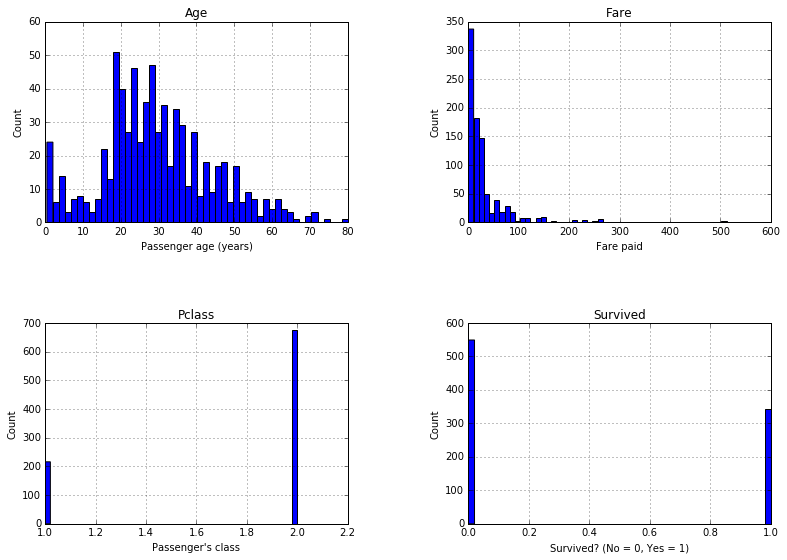

In [6]:
ax1 = titanic_df.hist(bins = 50, figsize = [13,9])
#setting label axis
ax1[0][0].set(xlabel="Passenger age (years)", ylabel="Count")
ax1[0][1].set(xlabel="Fare paid", ylabel="Count")
ax1[1][0].set(xlabel="Passenger's class", ylabel="Count")
ax1[1][1].set(xlabel="Survived? (No = 0, Yes = 1)", ylabel="Count")
#adjusting vertical and horizontal spacing
plt.subplots_adjust(hspace = 0.5, wspace = 0.4)
plt.show()


From previous plots we notice that there is an outsider point above 500 for Fare variable. We chose to remove any point above 300 as outsider for Fare data, as we are interested in mean behaviors. Other variables have reasonable behaviors.

In [8]:
titanic_df.loc[titanic_df['Fare'] > 300, 'Fare'] = NaN
print titanic_df['Fare'].count()

888


We have removed 2 data point only.

## Data Exploration

## 1 - Age/Fare survival statistics

We are interested in correlations of survivability and Age or Fare. 
First we group data in two categories: didn't survive = 0 and survived = 1 and describe general statistics:

In [9]:
titanic1_df =  titanic_df[['Survived','Age','Fare']]
titanic1_survival_group = titanic1_df.groupby('Survived')
titanic1_survival_group.describe()

Age        Fare
Survived                              
0        count  424.000000  549.000000
         mean    30.626179   22.117887
         std     14.172110   31.388207
         min      1.000000    0.000000
         25%     21.000000    7.854200
         50%     28.000000   10.500000
         75%     39.000000   26.000000
         max     74.000000  263.000000
1        count  290.000000  339.000000
         mean    28.343690   44.289799
         std     14.950952   50.470324
         min      0.420000    0.000000
         25%     19.000000   12.412500
         50%     28.000000   26.000000
         75%     36.000000   56.929200
         max     80.000000  263.000000

Again, total count for Age and Fare are different because of NaN values. The mean age of people who survived (28.3) is slightly smaller than of people who didn't survive (30.6). Also the mean fare paid by people who survived (48.4) is larger than paid by people who didn't survive (22.1).
Let's look at the histogram representation of the columns, first for non-survivors and then for survivors:

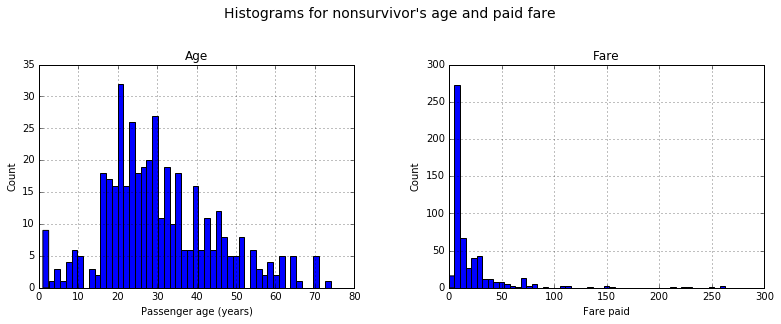

In [10]:
# ploting from group that didn't survive

ax2 = titanic1_survival_group.get_group(0).hist(bins = 50, figsize = [13,4],layout = [1,2])
ax2[0][0].set(xlabel="Passenger age (years)", ylabel="Count")
ax2[0][1].set(xlabel="Fare paid", ylabel="Count")
plt.suptitle("Histograms for nonsurvivor's age and paid fare", fontsize=14, x=0.5,y=1.1)

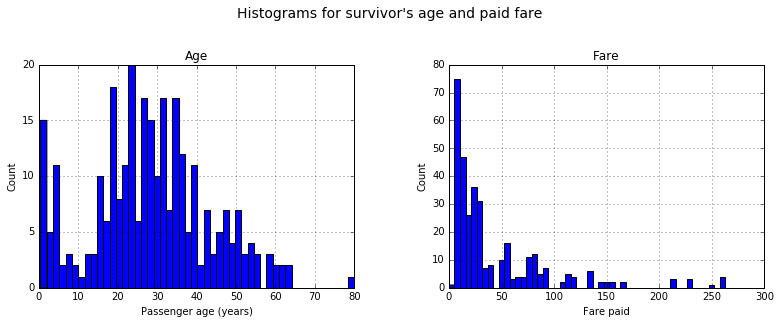

In [11]:
# ploting from group that survived

ax3 = titanic1_survival_group.get_group(1).hist(bins = 50, figsize = [13,4],layout = [1,2])
ax3[0][0].set(xlabel="Passenger age (years)", ylabel="Count")
ax3[0][1].set(xlabel="Fare paid", ylabel="Count")
plt.suptitle("Histograms for survivor's age and paid fare", fontsize=14, x=0.5,y=1.1)

The overall shape of the distributions are the same for each survival group: normal for Age and skewed for Fare. 

We have samples (891 or 714) of the overall tripulation data (2224), so we need statistical analysis for further analysis. We build two hypothesis tests to check the significance of above mentioned mean differences on the general population. For Age(a) and Fare(f), the Null hypothesis is that both population means for survivors (muS(af)) and non-survivors (muN(af)) are the same H0 : muS(af) = muN(af) and alternative hypothesis are that mean age of survivors is smaller than non_survivors age (HA: muS(a) < muN(a)) and mean fare of survivors is larger than non-survivors fare HA: muS(f) > muN(f).

We don't have the statistical variance for population, some we use one tail t-tests. We set an alpha level of 0.01 and look for t_critical = 2.34 on a t-table (approximate value for both sample sizes). Next we calculate the standard error and t-value for Age and Fare:


In [12]:
#Organizing data that we will need

titanic1_survived_mean = titanic1_survival_group.mean()
titanic1_survived_std = titanic1_survival_group.std(ddof = 0)
titanic1_survived_count = titanic1_survival_group.count()

print titanic1_survived_mean
print titanic1_survived_std
print titanic1_survived_count

                Age       Fare
Survived                      
0         30.626179  22.117887
1         28.343690  44.289799
                Age       Fare
Survived                      
0         14.155388  31.359607
1         14.925152  50.395829
          Age  Fare
Survived           
0         424   549
1         290   339


In [13]:
# A function to calculate standard error and another to calculate t

def stderror(s1,s2,n1,n2):
    STE = 0
    STE = sqrt(s1**2/n1 + s2**2/n2)
    return STE
    
def t_value(x1, x2, STE):
    t = (x1 - x2)/STE
    return t

# Now we use the values from the table to calculate the statistics

#Age

stderror_age = stderror(titanic1_survived_std['Age'][0],titanic1_survived_std['Age'][1],titanic1_survived_count['Age'][0], \
                        titanic1_survived_count['Age'][1])
age_t_value =  t_value(titanic1_survived_mean['Age'][0],titanic1_survived_mean['Age'][1],stderror_age)
print age_t_value

#Fare

stderror_fare = stderror(titanic1_survived_std['Fare'][0],titanic1_survived_std['Fare'][1],titanic1_survived_count['Fare'][0], \
                        titanic1_survived_count['Fare'][1])
fare_t_value =  t_value(titanic1_survived_mean['Fare'][1],titanic1_survived_mean['Fare'][0],stderror_fare)
print fare_t_value

2.0491404625
7.27704797077


We cannot reject the Null hypothesis of equality of Ages at alpha = 0.01 because 2.04 < t-critical, so the difference is not statistical significant in this case. In another hand, a t-score of 6.85 is very high and significant in the case o Fare. So it is very likely that people who paid more were more likely to survive the disaster.

## 2 Survival and gender

        Survived
Sex             
female        81
male         468
        Survived
Sex             
female       233
male         109


([<matplotlib.patches.Wedge at 0xcd139b0>,
 [<matplotlib.text.Text at 0xcd13f28>, <matplotlib.text.Text at 0xcd20ba8>],
 [<matplotlib.text.Text at 0xcd13fd0>, <matplotlib.text.Text at 0xcd20c50>])

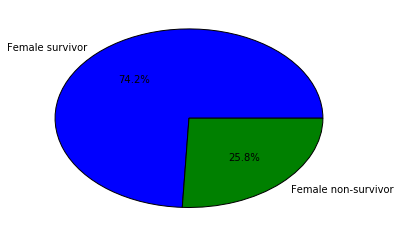

In [14]:
#new dataframe
titanic2_df = titanic_df[['Survived' ,'Sex']]

#group by survival
titanic2_survival_group = titanic2_df.groupby('Survived')

#counting elements in each group combination male\female survive\non-survive
survivors_by_sex = titanic2_survival_group.get_group(0).groupby('Sex').count()
non_survivors_by_sex = titanic2_survival_group.get_group(1).groupby('Sex').count()
print survivors_by_sex
print non_survivors_by_sex

female_survivor = non_survivors_by_sex['Survived'][0]
male_survivor = non_survivors_by_sex['Survived'][1]
female_non_survivor = survivors_by_sex['Survived'][0]
male_non_survivor = survivors_by_sex['Survived'][1]


#calculate plot sizes
sizesM = [male_survivor,male_non_survivor]
sizesF = [female_survivor,female_non_survivor]
labelM = ['Male survivor','Male non-survivor']
labelF = ['Female survivor', 'Female non-survivor']


#pie plot for female
plt.pie(sizesF,labels = labelF, autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0xcf18128>,
 [<matplotlib.text.Text at 0xcf186a0>, <matplotlib.text.Text at 0xcf23320>],
 [<matplotlib.text.Text at 0xcf18748>, <matplotlib.text.Text at 0xcf233c8>])

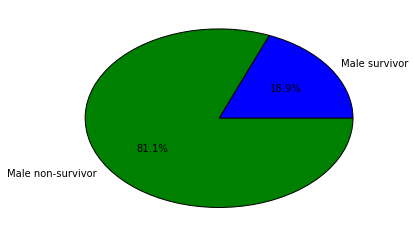

In [15]:
#pie plot for male 
plt.pie(sizesM,labels = labelM,autopct='%1.1f%%')

We see that roughly 3 out of 4 women survived the disaster while only 1 out of 5 men survived in this sample. 

([<matplotlib.patches.Wedge at 0xd08f128>,
  <matplotlib.text.Text at 0xd0abc18>])

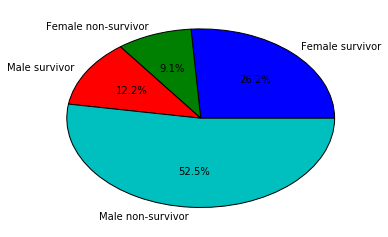

In [16]:
#overall pie plot

plt.pie(sizesF+sizesM,labels = labelF + labelM, autopct='%1.1f%%')

Next we use above data to test if the variables Survived and Sex are independent for entire population. We use Chi squared test for independency of variables. To be consistent, we set alpha level to 0.01 and set the Null hypothesis H0: Survived and Sex are independent and alternative hypothesis HA: Survived and Sex are dependent. The degrees of freedom are (2-1) * (2 - 1) = 1
Next we calculated Chi squared statistics:

In [17]:
#data we will need
survival_count = titanic2_survival_group.count()
print survival_count 


          Sex
Survived     
0         549
1         342


In [18]:
titanic2_sex_group = titanic2_df.groupby('Sex')
sex_count = titanic2_sex_group.count()
print sex_count


        Survived
Sex             
female       314
male         577


In [19]:
# first calculate an array of expected frequencies

n_f = sex_count.loc['female'][0]
n_m = sex_count.loc['male'][0]
n_0 = survival_count.loc[0][0]
n_1 =survival_count.loc[1][0]
n = n_f + n_m  # = n_0 + n_1

def expect_value(n1, n2,n):
    value = float(n1)*float(n2)/float(n)
    return value
        
Ef0 = expect_value(n_f,n_0,n)
Em0 = expect_value(n_m,n_0,n)
Ef1 = expect_value(n_f,n_1,n)
Em1 = expect_value(n_m,n_1,n)

expected_freq_array = np.array([Ef0,Em0,Ef1,Em1])
print expected_freq_array

[ 193.47474747  355.52525253  120.52525253  221.47474747]


In [20]:
# next the observation frequency
# values were calculated earlier

observed_freq_array = np.array([female_non_survivor, male_non_survivor,female_survivor,male_survivor])
print observed_freq_array

[ 81 468 233 109]


In [21]:
#finally the chi squared statistics

def chi(O,E):
    chi = 0 
    chi_part = 0
    for i in range(len(O)):
        chi_part = (O[i]-E[i])**2/E[i]
        chi += chi_part
    return chi

print chi(observed_freq_array, expected_freq_array) 

263.050574071


The value 263 is very large for a Chi squared critical value. We use a calculator to get the a p-value < 0.0001. So we reject the null hypothesis that Sex and survivability are independent with a 99.9% confidence.

## 3 Fare Pclass correlation

         Pclass     Fare
Pclass  1.00000 -0.64895
Fare   -0.64895  1.00000


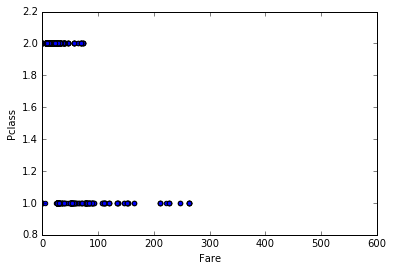

In [22]:
#Setting columns
titanic3_df =  titanic_df[['Pclass' , 'Fare']]

#Calculating correlation (Person) and plotting
print titanic3_df.corr()
titanic3_df.plot.scatter(x = 'Fare' , y = 'Pclass', xlim = [0,600])

There is a moderate negative correlation between fare and class. This means that first class persons were more likely to have paid more to be onboard.

## 4  First class women survival

The above comments indicates that first class women were very likely to have survived the disaster:

In [24]:
titanic4_df = titanic_df[['Pclass','Survived','Sex']]

titanic4_group = titanic4_df.groupby(['Sex','Pclass'])

# survival data are 0 or 1.  So we calculate the mean in each case to have percentages of survivability
# We also show count to get the idea of sample size.

print titanic4_group.mean()
print titanic4_group.count()


               Survived
Sex    Pclass          
female 1       0.968085
       2       0.645455
male   1       0.368852
       2       0.140659
               Survived
Sex    Pclass          
female 1             94
       2            220
male   1            122
       2            455


So almost 97% of first class females survived, compared with 14% of male second class in this sample. The is a strong indication that Sex and social class were determinant for survivabilty in titanic disaster.

# General conclusion

## Summary

We have performed hypothesis tests to understand how Age, Sex and Fare are related to survivability in titanic's disaster. We found values of 2.05 and 7.28 for one tail t-critical value of age and fare variables respectively. Those values are sufficient to conclude with a 99% confidence level that mean age is not related with survivability, while survivors have paid a larger mean fare for trip ticket. We also found a chi squared statistics of 263 while comparing Survived and Sex variables. This is more than enough to say with a 99% confidence level that Sex and Survived are not independent.

We have continued the analysis by estabilishing a correlation between Pclass and Fare variables of -0.59. This relates Pclass and Fare, and we hope that this brings us closer to answer the rich part of the question. Next we've calculated the percentages os male/female survivors/non_survivors and reached the striking values of 97% survival rate for first class women and 14% of second class men.

So 'rich and women first' is a reasonable answer for the original question.

## Limitations


- The first part of the analysis is more rigorous and the conclusions can be infered to general population (99% confidence). The second part lacks statistical analysis, and can be stated only for the sample. We use this only as further indication for our conclusion. To improve quality of the analysis we could apply other hypothesis tests to investigate the population behavior for these categories.

- The answer is only reasonable because our analysis states correlation while the answer implies causation, which is not the case. It is reasonable to believe that women and rich had a better chance of survival because they were rich and women, but the analysis doesn't state that. 

- Supplied data is very good in general. We have disregarded NaN data values for Age, 2 outlier data point for Fare and turned the third class into second class for Pclass variable. This treatment has decreased a little our sample size and limits the analysis to focusing on the general mean behavior.

- Also our analysis lack consideration of variables that might be important, such as the location of the passenger in the ship during the crash event, or if he was a member of the tripulation or not.



# References

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv
http://stackoverflow.com/questions/31760509/how-to-plot-a-ylabel-per-subplot-using-pandas-dataframe-plot-function
http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.suptitle
http://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib
http://stackoverflow.com/questions/18196203/how-to-conditionally-update-dataframe-column-in-pandas
http://stackoverflow.com/questions/21608228/conditional-replace-pandas
http://stackoverflow.com/questions/17812978/how-to-plot-two-columns-of-a-pandas-data-frame-using-points
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.GroupBy.get_group.html
http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf
http://stattrek.com/hypothesis-test/difference-in-means.aspx?Tutorial=AP
http://stackoverflow.com/questions/17573814/count-occurrences-of-certain-words-in-pandas-dataframe
http://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html
http://stattrek.com/online-calculator/chi-square.aspx